In [12]:
%matplotlib inline
import numpy as np
import emcee

In [2]:
def lnprob(x, mu, icov):
    diff = x-mu
    return -np.dot(diff,np.dot(icov,diff))/2.0

In [3]:
ndim = 2

means = np.random.rand(ndim)

cov = 0.5 - np.random.rand(ndim ** 2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov,cov)

In [4]:
icov = np.linalg.inv(cov)

In [7]:
nwalkers = 20
# Initial guess. Let's just use random
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

In [8]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[means, icov])

In [9]:
pos, prob, state = sampler.run_mcmc(p0, 100)
sampler.reset()

In [14]:
sampler.run_mcmc(pos, 10000)

(array([[ 0.42705451,  0.29687538],
        [ 0.07385691, -0.31534686],
        [ 0.54486799,  0.71952877],
        [ 0.14207941,  0.97372482],
        [ 0.13433326,  0.29049054],
        [ 0.34705673,  0.27980533],
        [-0.11747131,  0.35142132],
        [ 0.50785902,  0.21997934],
        [ 0.07316122,  0.73763612],
        [ 0.0566795 ,  0.94992688],
        [ 0.11893322,  0.59258462],
        [-0.10839719, -0.25591211],
        [-0.12321812,  1.0094525 ],
        [ 0.55977028,  0.29332193],
        [ 0.68549706,  0.69090345],
        [ 0.3236433 ,  0.40790644],
        [ 0.0584463 ,  0.11091126],
        [ 0.49754883,  0.51559735],
        [ 0.35733177, -0.08863275],
        [-0.30236508, -0.34757866]]),
 array([-0.59936797, -1.58543739, -0.65494016, -0.5929078 , -0.22158681,
        -0.36781137, -1.1297563 , -1.15201461, -0.45129804, -0.89135879,
        -0.18120287, -1.81573361, -2.2279221 , -1.29292297, -1.52678268,
        -0.14737427, -0.56739774, -0.58052588, -1.313046  ,

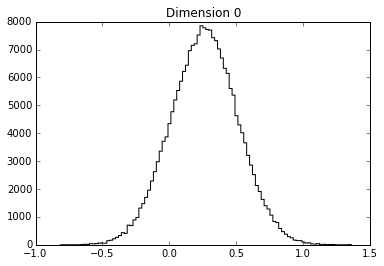

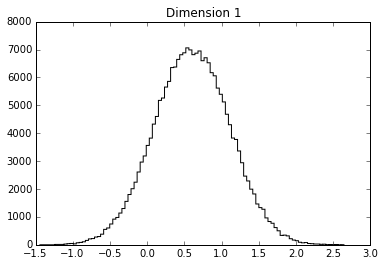

In [18]:
import matplotlib.pyplot as pl

for i in range(ndim):
    pl.figure()
    pl.hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
    pl.title("Dimension {0:d}".format(i))

pl.show()